<a href="https://colab.research.google.com/github/gmelaku/GM/blob/master/MP11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #COVID-19: a threat to our existence?

In this project, we will be creating a regression model to predict the total confirmed cases on upcoming days based on a trend of confirmed cases for about a month starting __April 1, 2020__

#Import the required libraries 

We will first import the necessary libraries into our notebook. 

In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download the data

We will firt clone the __COVID-19__ data from Data Repository by Johns Hopkins CSSE

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 22514 (delta 22), reused 14 (delta 7), pack-reused 22469
Receiving objects: 100% (22514/22514), 98.34 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (12171/12171), done.


#Create pandas DataFrame.

Using __read_csv()__ funtions of panda, we will convert the csv file into pandas dataframe. Let's call this dataframe as __"global_confirmed"__

In [0]:
global_confirmed = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


To see if the dataframe is created, let's call upon the __.head()__to see the top 5 rows of the dataframe

In [6]:
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25


We can also see the total number of rows and coluns of our dataframe using __.shape()__ functions. In the output the first number will always be the number of rows and the second number is the number of columns.

In [8]:
global_confirmed.shape

(264, 99)

#Data cleaning 

To build a model, we don't need the whole dataset. We will have to refine the columns we need for this regression model that we are planning to create. For the sake of simpliity and taking the progression of the disease in the recent past, we would like to use the global daily total confirmed cases for the month of April. Therefore, we need to filter out the __Date columns__ earlier than __APRIL 1st__. 


To do so we will need to print the column names first

In [9]:
global_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

For our purpose, we don't need __province/state, Latitude, and Longitude__. Therefore we will create a new dataframe that has columns containing __Country/Region__ along with Dates from __4/1/20__ through __4/24/20__. And let's call this dataframe as __df__

In [11]:
df = global_confirmed[['Country/Region','4/1/20','4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
       '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20',
       '4/21/20', '4/22/20', '4/23/20', '4/24/20']]
df.head()

,Country/Region,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,Afghanistan,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351
1,Albania,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678
2,Algeria,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,Andorra,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731
4,Angola,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25


##Total number of confirmed globally

To build a model we will need to know the total confirmed cases in each date columns using __.sum()__ operations.

In [12]:
df.sum(axis=0) 

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
4/1/20                                                       932475
4/2/20                                                      1013326
4/3/20                                                      1095698
4/4/20                                                      1175857
4/5/20                                                      1249484
4/6/20                                                      1321131
4/7/20                                                      1396092
4/8/20                                                      1479804
4/9/20                                                      1565278
4/10/20                                                     1657526
4/11/20                                                     1735650
4/12/20                                                     1834721
4/13/20                                                     1904838
4/14/20                                         

### Adding a row for the total number of confirmed cases

Let's add a rown for confirmed cases from 4/1/20 to 4/24/20

In [13]:
df.loc['Total']= df.sum()
df.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country/Region,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
260,South Sudan,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5
261,Western Sahara,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
263,Yemen,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Total,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,932475,1013326,1095698,1175857,1249484,1321131,1396092,1479804,1565278,1657526,1735650,1834721,1904838,1975195,2055057,2151421,2239144,2316716,2400078,2471247,2548091,2623049,2707728,2809499


## Drop Country/Region columns

For this model, we are only interested on the global daily total. We can therefore drop the country/Region columns

In [14]:
df1 = df.drop(['Country/Region'], axis=1)
df1.head()

,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351
1,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678
2,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731
4,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25


Let's see the bottom of our new dataframe too

In [15]:
df1.tail()

,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
260,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5
261,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
263,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Total,932475,1013326,1095698,1175857,1249484,1321131,1396092,1479804,1565278,1657526,1735650,1834721,1904838,1975195,2055057,2151421,2239144,2316716,2400078,2471247,2548091,2623049,2707728,2809499


##Transpose the dataframe

We wanted to have __Dates__ column and __Total__ columns to build the model. We will transpose the dataframe to change columns to rows and rows to columns.


In [16]:
df1 = df1.T
df1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,Total
4/20/20,1026,584,2718,717,24,23,2941,1339,104,2963,28,1019,435,200,1329,545,14795,1436,60,1907,2948,75,6264,39983,54,5,564,1309,40743,138,929,581,67,122,1163,2908,1647,13,254,118,...,784326,1627,256,268,65,25,-1,16,14,39,39,22,18,0,19,51,449,50,246,15,5,11,510,119,3,5,11,9,20,5,43,5,17,11,1,4,6,4,1,2471247
4/21/20,1092,609,2811,717,24,23,3031,1401,104,2969,28,1024,437,201,1336,546,14873,1480,65,1973,3382,75,6723,40956,54,6,598,1342,43079,138,975,600,68,122,1163,3095,1724,13,255,118,...,811865,1678,285,268,70,28,-1,16,14,39,42,23,18,0,19,51,466,50,258,15,5,11,510,121,3,5,11,9,20,5,50,5,18,11,1,4,6,4,1,2548091
4/22/20,1176,634,2910,723,25,24,3144,1473,104,2971,28,1024,438,205,1336,546,14925,1518,65,2027,3772,75,7281,41889,54,6,609,1368,45757,138,1024,609,73,122,1163,3401,1795,-1,257,118,...,840351,1716,288,268,74,28,-1,16,15,41,42,23,18,0,19,59,474,50,293,15,5,11,510,123,3,5,11,9,22,11,61,5,23,11,1,4,6,4,1,2623049
4/23/20,1279,663,3007,723,25,24,3435,1523,104,2976,28,1026,438,207,1337,546,15002,1548,72,2217,4186,76,8022,42797,54,7,703,1413,50036,138,1097,616,82,122,1334,3720,1824,-1,262,118,...,869170,1758,311,268,76,28,0,16,15,46,42,23,18,0,19,60,480,50,309,15,5,11,510,139,3,5,11,9,22,11,64,5,33,12,1,5,6,4,1,2707728
4/24/20,1351,678,3127,731,25,24,3607,1596,105,2982,28,1026,438,207,1343,548,15071,1592,73,2518,4689,77,8773,44293,54,7,807,1421,54043,138,1234,629,88,122,1430,4017,1853,-1,263,118,...,905358,1804,318,270,84,29,0,16,15,65,42,24,18,0,19,61,484,52,325,15,5,11,510,144,3,5,11,9,22,11,82,5,33,13,1,5,6,4,1,2809499


##Insert column

As we can see the __date column__ is serving as index for the whole dataframe. We will need to duplicate the value by inserting a new column named __Dates__ so that values in it can be manipulated.

In [29]:
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
df1.insert(0, 'Date', data)
df1.head()

,Date,Dates,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,Total
4/1/20,1,4/1/20,237,259,847,390,8,7,1054,571,84,2182,19,781,367,69,968,392,10711,359,21,569,54,34,163,13964,13,4,115,459,6836,131,422,282,6,109,233,754,1013,13,...,213242,181,143,218,36,8,0,12,9,10,10,1,3,0,10,10,134,9,31,8,2,5,125,15,2,3,6,9,4,2,2,0,0,0,0,0,0,0,0,932475
4/2/20,2,4/2/20,273,277,986,428,8,9,1133,663,87,2298,21,835,367,72,1036,400,11129,400,24,643,56,46,304,15348,13,5,123,533,8044,133,457,288,6,110,306,969,1121,13,...,243622,205,146,233,39,9,0,12,10,10,16,1,3,0,10,11,161,9,36,9,2,6,125,20,3,3,5,9,4,3,2,2,3,0,0,0,0,0,0,1013326
4/3/20,3,4/3/20,281,304,1171,439,8,15,1265,736,91,2389,22,873,396,74,1085,400,11524,443,24,672,61,51,351,16770,16,5,132,579,9056,134,485,302,6,114,509,969,1174,13,...,275367,227,153,237,39,9,0,12,12,10,16,1,4,0,10,11,194,15,39,9,2,6,126,20,3,3,5,9,4,3,2,2,3,0,0,0,0,0,0,1095698
4/4/20,4,4/4/20,299,333,1251,466,10,15,1451,770,93,2493,26,900,407,80,1115,436,11781,521,28,688,70,52,440,18431,16,5,139,624,10360,135,503,318,7,114,555,1075,1203,13,...,308650,266,155,240,39,9,0,14,12,10,16,1,4,0,10,18,217,18,41,9,4,6,135,21,3,3,5,9,4,3,4,2,4,1,0,0,0,0,0,1175857
4/5/20,5,4/5/20,349,361,1320,501,14,15,1451,822,96,2580,27,907,407,82,1135,453,12051,584,28,700,88,56,562,19691,22,5,157,654,11130,135,531,345,7,114,650,1181,1203,13,...,336802,342,159,241,39,9,0,14,12,10,19,1,5,0,11,18,237,18,45,10,4,6,145,21,3,3,5,9,6,3,6,2,4,2,1,1,4,0,0,1249484


##Final Dataframe

Let's now create a dataframe containing __Dates__ and __Total__ columns

In [30]:
df2 =df1[['Date', 'Total']]
df2.head()

,Date,Total
4/1/20,1,932475
4/2/20,2,1013326
4/3/20,3,1095698
4/4/20,4,1175857
4/5/20,5,1249484


#Visualization

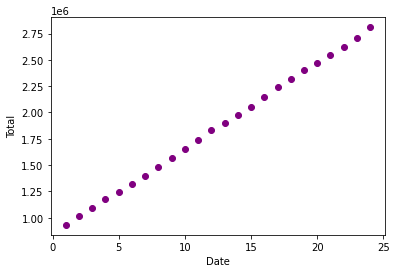

In [32]:
plt.scatter(df2.Date, df2.Total,  color='purple')
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

As can be seen from the scatter plot above, as the day goes by the number of confirmed cases are increasing in a linear manner. The date is therefore a predictor of the the total confirmed cases. With this trend and natural course of the disease, we will build a model that will predict the total confirmed cases at day 54 (which is __May 24th__

#Simple Linear Regression

###Train Test split of DataFrame

Lets split our dataframe into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [0]:
mask = np.random.rand(len(df2)) < 0.8
train = df2[mask]
test = df2[~mask]

###Train data distribution

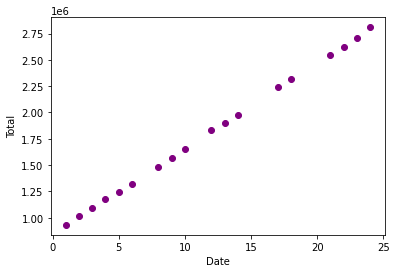

In [37]:
plt.scatter(train.Date, train.Total,  color='Purple')
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

##Modeling

Using sklearn package to model data.

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Date']])
train_y = np.asanyarray(train[['Total']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[81285.19843049]]
Intercept:  [845394.32959641]


###Plot outputs
we can plot the fit line over the data:

Text(0, 0.5, 'Total')

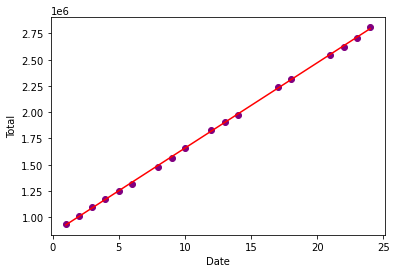

In [39]:
plt.scatter(train.Date, train.Total,  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date")
plt.ylabel("Total")

## Evaluation 

We will evaluate the model using __Mean Absolute error__, __Residual sum of square (MSE)__ and __R-squared score__(accuracy)

In [40]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Date']])
test_y = np.asanyarray(test[['Total']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 7945.44
Residual sum of squares (MSE): 96267237.22
R2-score: 1.00
